In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
import seaborn as sns
import plotly.express as px

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
my_data=pd.read_csv("C:/Users/Annamalai/Downloads/UNSW.csv")

In [4]:
my_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,service,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,service,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,service,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,service,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,service,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y=my_data.iloc[:,-1]
x=my_data.iloc[:,:-1]

In [7]:
x

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1,0.000011,udp,service,INT,2,0,496,0,90909.090200,...,1,1,2,0,0,0,1,2,0,Normal
1,2,0.000008,udp,service,INT,2,0,1762,0,125000.000300,...,1,1,2,0,0,0,1,2,0,Normal
2,3,0.000005,udp,service,INT,2,0,1068,0,200000.005100,...,1,1,3,0,0,0,1,3,0,Normal
3,4,0.000006,udp,service,INT,2,0,900,0,166666.660800,...,2,1,3,0,0,0,2,3,0,Normal
4,5,0.000010,udp,service,INT,2,0,2126,0,100000.002500,...,2,1,3,0,0,0,2,3,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,service,INT,2,0,104,0,200000.005100,...,1,1,2,0,0,0,2,1,0,Normal
82328,82329,1.106101,tcp,service,FIN,20,8,18062,354,24.410067,...,1,1,1,0,0,0,3,2,0,Normal
82329,82330,0.000000,arp,service,INT,1,0,46,0,0.000000,...,1,1,1,0,0,0,1,1,1,Normal
82330,82331,0.000000,arp,service,INT,1,0,46,0,0.000000,...,1,1,1,0,0,0,1,1,1,Normal


In [8]:
label=LabelEncoder()

In [9]:
x['proto']=label.fit_transform(x['proto'])
x['service']=label.fit_transform(x['service'])
x['state']=label.fit_transform(x['state'])
x['attack_cat']=label.fit_transform(x['attack_cat'])

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA(n_components=10)


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [14]:
error=list()
for i in range(1,25):
            model=make_pipeline(pca,KNeighborsClassifier(n_neighbors=i))
            model.fit(x_train,y_train)
            ans=model.predict(x_test)
            error.append(np.mean(ans!=y_test))

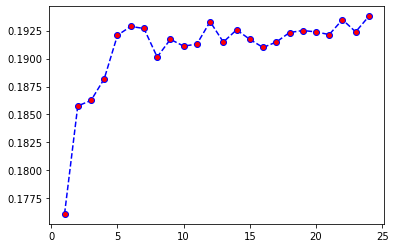

In [15]:
plt.plot(range(1,25),error,'b',marker='o',markerfacecolor='red',linestyle='dashed')
plt.show()

In [17]:
model=make_pipeline(pca,KNeighborsClassifier(n_neighbors=1))
model.fit(x_train,y_train)
ans=model.predict(x_test)

<AxesSubplot:>

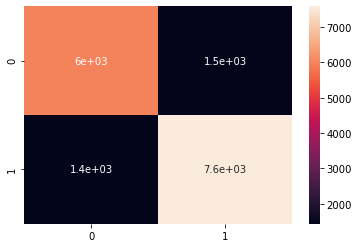

In [18]:
sns.heatmap(confusion_matrix(ans,y_test),annot=True)

In [19]:
accuracy_score(ans,y_test)*100

82.38902046517276

In [22]:
import joblib
joblib.dump(model,'sanjay_knn_model_pca.sav')

['sanjay_knn_model_pca.sav']

In [23]:
loaded_model=joblib.load('sanjay_knn_model_pca.sav')